In [1]:
import numpy as np
import pandas as pd 
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10,7

import sys
#sys.path.append('/Users/ayoubennassiri/Documents/Projects/advancedFML/src') #TODO: Change the append
#sys.path.append('/Users/ayoubennassiri/Documents/Projects/advancedFML/')
sys.path.append('../src') #TODO: Change the append
sys.path.append('..')

## Load the data

In [2]:
clean_data_path = '../data/processed/clean_IVE_tickbidask.parq'
#clean_data_path = '../data/processed/clean_WDC_tickbidask.parq'
df = pd.read_parquet(clean_data_path)

C:\Users\aennassiri\AppData\Local\Continuum\anaconda3\envs\advancesFML\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
C:\Users\aennassiri\AppData\Local\Continuum\anaconda3\envs\advancesFML\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
C:\Users\aennassiri\AppData\Local\Continuum\anaconda3\envs\advancesFML\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [3]:
x = df.tail(30)
x

,price,bid,ask,vol,dollar_vol
date,,,,,
2019-03-21 15:57:12,113.7800,113.77,113.78,101,11491.7800
2019-03-21 15:58:06,113.7922,113.79,113.80,3400,386893.4800
2019-03-21 15:58:06,113.7922,113.79,113.80,600,68275.3200
2019-03-21 15:58:10,113.8000,113.80,113.81,161,18321.8000
2019-03-21 15:58:33,113.8000,113.80,113.81,273,31067.4000
2019-03-21 15:58:37,113.7900,113.79,113.80,113,12858.2700
2019-03-21 15:58:42,113.7834,113.78,113.79,204,23211.8136
2019-03-21 15:58:56,113.7900,113.78,113.79,124,14109.9600
2019-03-21 15:58:58,113.7951,113.79,113.80,124,14110.5924


C:\Users\aennassiri\AppData\Local\Continuum\anaconda3\envs\advancesFML\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


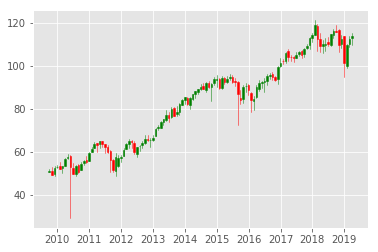

In [4]:
from src.visualization.candle import plot_candlestick_ohlc

df_ohlc = df.price.resample('1M').ohlc() 

fig, ax = plt.subplots()
plot_candlestick_ohlc(df_ohlc, ax, width=18)

### Use the ETF trick to deal with the roll
The data loaded are already ETF https://www.ishares.com/us/products/239728/ishares-sp-500-value-etf
TODO: Add example on any available stock.

## Bars

In [5]:
from features.bars import tick_bar
from features.bars import volume_bar
from features.bars import dollar_bar

### Tick Bar

In [6]:
m = 10
tick_df = tick_bar(df, m)
tick_x = tick_bar(x, m)
tick_x

,price,bid,ask,vol,dollar_vol
date,,,,,
2019-03-21 15:57:12,113.78,113.77,113.78,101,11491.78
2019-03-21 15:59:35,113.77,113.77,113.79,400,45508.00
2019-03-21 15:59:58,113.81,113.80,113.81,442,50304.02


You can see that tick took samples every 10 transactions

### Volume Bar

In [7]:
m = 1_000
vol_df = volume_bar(df, m)
vol_x = volume_bar(x, m)

In [8]:
vol_x

,price,bid,ask,vol,dollar_vol,cum_vol
date,,,,,,
2019-03-21 15:58:06,113.7922,113.79,113.80,3400,386893.48,3501
2019-03-21 15:58:33,113.8000,113.80,113.81,273,31067.40,1034
2019-03-21 15:59:35,113.7700,113.77,113.79,400,45508.00,1128
2019-03-21 15:59:52,113.7500,113.74,113.76,361,41063.75,1116
2019-03-21 15:59:58,113.8100,113.80,113.81,654,74431.74,1389
2019-03-21 15:59:58,113.8100,113.80,113.81,596,67830.76,1038
2019-03-21 15:59:58,113.8100,113.80,113.81,644,73293.64,1300
2019-03-21 16:00:00,113.7900,113.79,113.80,4551,517858.29,4551


The tick volume in bars for the sample data has a cumulative volume bigger than the threshold m

### Dollar Bar

In [9]:
minute_df = df.price.resample('min').ohlc().dropna()

m = 100_000
dollar_df = dollar_bar(df, m)
dollar_x = dollar_bar(x, m)

In [10]:
dollar_x

,price,bid,ask,vol,dollar_vol,cum_dollar_vol,idx
date,,,,,,,
2019-03-21 15:58:06,113.7922,113.79,113.80,3400,386893.48,398385.260,1
2019-03-21 15:58:33,113.8000,113.80,113.81,273,31067.40,117664.520,4
2019-03-21 15:59:35,113.7700,113.77,113.79,400,45508.00,128346.406,10
2019-03-21 15:59:52,113.7500,113.74,113.76,361,41063.75,126949.860,14
2019-03-21 15:59:58,113.8100,113.80,113.81,654,74431.74,158051.620,19
2019-03-21 15:59:58,113.8100,113.80,113.81,596,67830.76,118134.780,21
2019-03-21 15:59:58,113.8100,113.80,113.81,644,73293.64,147953.000,23
2019-03-21 16:00:00,113.7900,113.79,113.80,4551,517858.29,517858.290,24


The tick dollar bar depends on the threshold defined (100k dollars) and samples the price whenever this threshold is reached. 

In [11]:
print(f"Period : {tick_df.index[0]}, {tick_df.index[-1]}")
print(f"Shape of the initial data : {df.shape}, minute selected : {minute_df.shape}")
print(f"Shape of the tick bars : {tick_df.shape}")
print(f"Shape of the volume bars  : {vol_df.shape}")
print(f"Shape of the dollar bars : {dollar_df.shape}")

Period : 2009-09-28 09:30:00, 2019-03-21 16:10:00
Shape of the initial data : (1580115, 5), minute selected : (570176, 4)
Shape of the tick bars : (158012, 5)
Shape of the volume bars  : (453039, 6)
Shape of the dollar bars : (399520, 7)


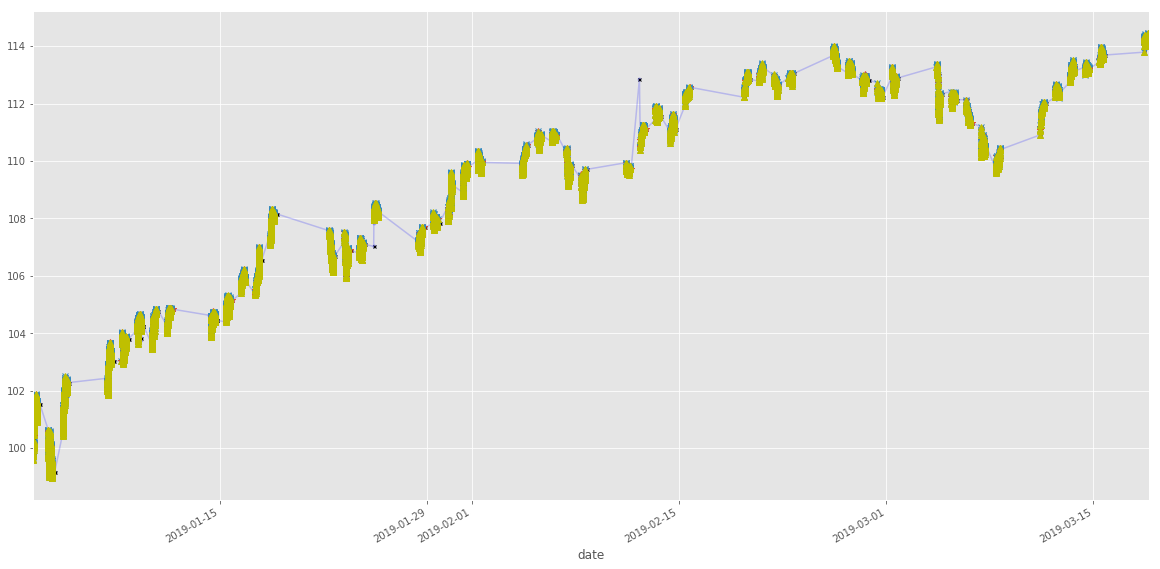

In [12]:
s_date='2019-01-01 8:00:00'
e_date='2019-03-18 18:40:00'
plt.figure(figsize=(20,10))
df.loc[s_date:e_date].price.plot(marker='o',
                                 ms=3,
                                 color='b',
                                 alpha=0.2,
                                 label='tick')

minute_df.open.loc[s_date:e_date].plot(marker='x',
                                       ms=3,
                                       ls='',
                                       color='k',
                                       label='tick')
tick_df.loc[s_date:e_date].price.plot(marker='*',
                                      ls='',
                                      label='tick bar')
vol_df.loc[s_date:e_date].price.plot(marker='x',
                                     ls='',
                                     label='vol bar')
dollar_df.loc[s_date:e_date].price.plot(marker='^',
                                        ls='',
                                        color='y',
                                        label='dollar bar')

### Number of bars produced by tick, volume and dollar bars

In [13]:
weekly_tick_count = tick_df.price.resample('1W').count()
weekly_vol_count = vol_df.price.resample('1W').count()
weekly_dollar_count = dollar_df.price.resample('1W').count()

In [14]:
count_df = pd.DataFrame(columns=['count_mean','count_std'], index=['tick', 'vol', 'dollar'])
count_df.loc['tick'] = [weekly_tick_count.mean(), weekly_tick_count.std()]
count_df.loc['vol'] = [weekly_vol_count.mean(), weekly_vol_count.std()]
count_df.loc['dollar'] = [weekly_dollar_count.mean(), weekly_dollar_count.std()]
count_df

,count_mean,count_std
tick,319.216,197.129
vol,915.23,542.38
dollar,807.111,569.238


From the plots below, the expectation is to see that the dollar bars is stable over time.
The bar size could be adjusted dynamically as a function of the free-floating market capitalization of a company (in the case of stocks) or the outstanding amound of issued debt (in the case of fixed-income securities)

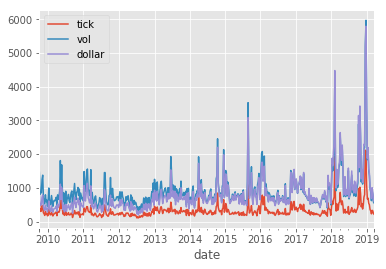

In [15]:
fig, ax = plt.subplots(1)
weekly_tick_count.plot(ax=ax)
weekly_vol_count.plot(ax=ax)
weekly_dollar_count.plot(ax=ax)
ax.legend(["tick", "vol", 'dollar'])

In [17]:
def scale(s):
    return (s-s.min())/(s.max()-s.min())

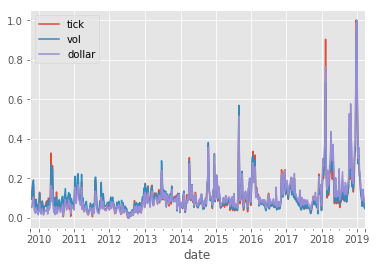

In [18]:
fig, ax = plt.subplots(1)
scale(weekly_tick_count).plot(ax=ax)
scale(weekly_vol_count).plot(ax=ax)
scale(weekly_dollar_count).plot(ax=ax)
ax.legend(["tick", "vol", 'dollar'])

## Serial correlation of returns 

In [19]:
# log returns
tick_returns = np.log(tick_df.price).diff().dropna()
vol_returns = np.log(vol_df.price).diff().dropna()
dollar_returns = np.log(dollar_df.price).diff().dropna()

In [20]:
returns_corr_df = pd.DataFrame(data={'returns_autocorr':[tick_returns.autocorr(lag=1),  
                                                         vol_returns.autocorr(lag=1), 
                                                         dollar_returns.autocorr(lag=1)]
                                    },
                               index=['tick', 'vol', 'dollar'])
returns_corr_df

,returns_autocorr
tick,0.119800
vol,-0.170120
dollar,0.087667


The dollar bar method has the lowest serial correlation

### Variance of monthly returns subsets 
Partition the bar series into monthly subset and calculation of the variance of variances. 

In [21]:
monthly_tick_var = tick_returns.groupby(pd.Grouper(freq='M')).var()
monthly_vol_var = vol_returns.groupby(pd.Grouper(freq='M')).var()
monthly_dollar_var = dollar_returns.groupby(pd.Grouper(freq='M')).var()

In [22]:
print(f"Variance of variances of the tick bars : {monthly_tick_var.var()}")
print(f"Variance of variances of the volume bars  : {monthly_vol_var.var()}")
print(f"Variance of variances of the dollar bars : {monthly_dollar_var.var()}")

Variance of variances of the tick bars : 7.151190340087026e-11
Variance of variances of the volume bars  : 8.215780402458611e-11
Variance of variances of the dollar bars : 6.341655526981834e-11


The dollar bar method exhibits the smallest variance of variances indeed.

### Jarque-Bera normality test

In [23]:
print(f"Result on the tick bars method   : {stats.jarque_bera(tick_returns)}, {tick_returns.count()}, {stats.jarque_bera(tick_returns)[0]/tick_returns.count()}")
print(f"Result on the volume bars method : {stats.jarque_bera(vol_returns)}, {vol_returns.count()}, {stats.jarque_bera(vol_returns)[0]/vol_returns.count()}")
print(f"Result on the dollar bars method : {stats.jarque_bera(dollar_returns)}, {dollar_returns.count()},  {stats.jarque_bera(dollar_returns)[0]/dollar_returns.count()}")

Result on the tick bars method   : (114384506461.55592, 0.0), 158011, 723902.1742888528
Result on the volume bars method : (35988604619717.53, 0.0), 453038, 79438379.60550226
Result on the dollar bars method : (7067956584978.779, 0.0), 399519,  17691165.08846583


First, we reject the null hypothesis joint of the skewness being zero and that the excess kurtosis is equal to zero as the p-value for the hypothesis test is zero. 

We cannot confirm that the dollar return method has the lowest test statistic

TODO: Review this test and compare with other normality tests

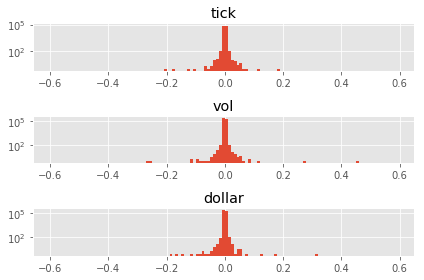

In [25]:
bins = np.arange(-0.6,0.6,0.01)
fig, ax = plt.subplots(3,1)
ax[0].hist(tick_returns, bins=bins)
ax[0].set_title('tick')
ax[1].hist(vol_returns, bins=bins)
ax[1].set_title('vol')
ax[2].hist(dollar_returns, bins=bins)
ax[2].set_title('dollar')
[a.set_yscale('log') for a in ax]
fig.tight_layout()

## Dollar Imbalance Bar

The dollar imbalance bar DIB is defined as a T*-contiguous subset of ticks such that :
$$
\begin{equation*}
T^\star = \underset{T}{\operatorname{argmax}} \left(|\theta_T|  \geq E_0[T]|2\nu^+ - E_0[\nu_t]| \right)
\end{equation*}
$$
where:
- $E_0[T]$ can be estimated by a EWMA (exponentially weighted moving average of T values from prior bars)
- $(2\nu^+ - E_0[\nu_t])$ as an EWMA of $b_t\nu_t$
- $\theta_T = \sum_{t=1}^T  b_t\nu_t $ where $b_t$ is defined with the tick rule : 
$$
\begin{equation}
  b_t = 
  \begin{cases}
    b_{t-1} & \text{if $\Delta_{p_t} = 0$} \\
    \frac{|\Delta_{p_t}|}{\Delta_{p_t}} & \text{otherwise}
  \end{cases}
\end{equation}
$$

In [28]:
## b_t tick rule construction 
def tick_rule(deltapt):
    if deltapt == 0:
        return np.nan
    else:
        return abs(deltapt)/deltapt
    
dollar_df["bt"] = dollar_df.price.diff().fillna(method='bfill').map(tick_rule).fillna(method='ffill')

## theta_t calculation 
dollar_df["bt_vt"] = dollar_df["bt"].multiply(dollar_df.dollar_vol)

dollar_df["theta"] = dollar_df["bt_vt"].cumsum()

## EWMA of E[T] 
dollar_df["ET"] = dollar_df["idx"].ewm(span=100,min_periods=0,adjust=False,ignore_na=False).mean()
dollar_df["Ebt_vt"] = dollar_df["bt_vt"].ewm(span=100,min_periods=0,adjust=False,ignore_na=False).mean()

In [29]:
# Tick rule explanation and verification
# Initial data 
dollar_x["diff"] = dollar_x.price.diff()
# Delta p_t calculation
dollar_x["deltapt"] = dollar_x["diff"].fillna(method='bfill')
# Filling the initial condition with the next valid value
dollar_x["tickrule"] = dollar_x["deltapt"].map(tick_rule)
# Applying the tick rule 
dollar_x["bt"] = dollar_x["tickrule"].fillna(method='ffill')
# If Delta pt = 0, give the previous value 
# Theta T construction 
dollar_x["theta_t"] = dollar_x["bt"].multiply(dollar_x.dollar_vol).cumsum()
dollar_x["bt_vt"] = dollar_x["bt"].multiply(dollar_x.dollar_vol)

# EWMA Estimation of E[T]
dollar_x["ET"] = dollar_x["idx"].ewm(span=100,min_periods=0,adjust=False,ignore_na=False).mean()
dollar_x["Ebt_vt"] = dollar_x["bt_vt"].ewm(span=100,min_periods=0,adjust=False,ignore_na=False).mean()

print(f"{dollar_x}")

                        price     bid     ask   vol  dollar_vol  \
date                                                              
2019-03-21 15:58:06  113.7922  113.79  113.80  3400   386893.48   
2019-03-21 15:58:33  113.8000  113.80  113.81   273    31067.40   
2019-03-21 15:59:35  113.7700  113.77  113.79   400    45508.00   
2019-03-21 15:59:52  113.7500  113.74  113.76   361    41063.75   
2019-03-21 15:59:58  113.8100  113.80  113.81   654    74431.74   
2019-03-21 15:59:58  113.8100  113.80  113.81   596    67830.76   
2019-03-21 15:59:58  113.8100  113.80  113.81   644    73293.64   
2019-03-21 16:00:00  113.7900  113.79  113.80  4551   517858.29   

                     cum_dollar_vol  idx    diff  deltapt  tickrule   bt  \
date                                                                       
2019-03-21 15:58:06      398385.260    1     NaN   0.0078       1.0  1.0   
2019-03-21 15:58:33      117664.520    4  0.0078   0.0078       1.0  1.0   
2019-03-21 15:59:35      